In [306]:
import numpy as np                    #xử lý mảng, ma trận
import matplotlib.pyplot as plt       #công cụ vẽ đồ thị
import seaborn as sns                 #vẽ đẹp đồ thị
import sklearn                        #các mô hình máy học cơ bản + các dataset nổi tiếng
import pandas as pd                   #xử lý các bảng số liệu

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [307]:
class LinearRegression_GD:
    
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return self.net_input(X)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = [ ]
        for n_iters in range (self.max_iter):
            error = y - self.predict(X)
            self.w[1:] += self.eta * X.T.dot(error)
            self.w[0] += self.eta * error.sum()
            cost = (error**2).sum() / 2
            self.costs.append(cost)

In [308]:
url_fish='https://drive.google.com/file/d/1H4YP9prg0Fgmza9iPZb-FcgdgccVS7Ni/view?usp=sharing'
url2_fish='https://drive.google.com/uc?id=' + url_fish.split('/')[-2]
df_fish = pd.read_csv(url2_fish)

In [309]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


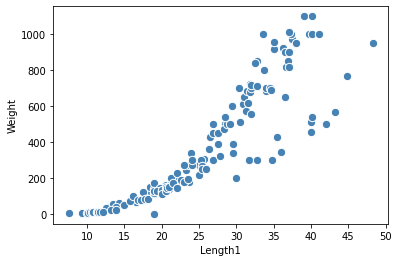

In [418]:
plt.scatter(df_fish['Length1'],df_fish['Weight'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()

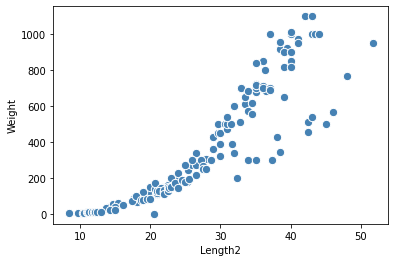

In [419]:
plt.scatter(df_fish['Length2'],df_fish['Weight'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.show()

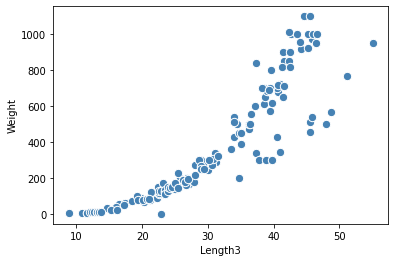

In [420]:
plt.scatter(df_fish['Length3'],df_fish['Weight'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.show()

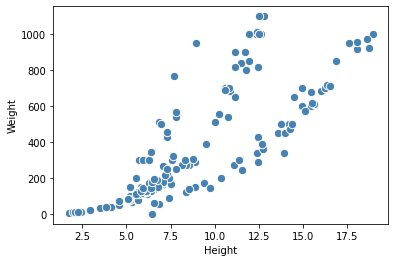

In [421]:
plt.scatter(df_fish['Height'],df_fish['Weight'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

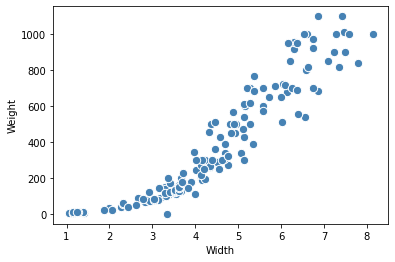

In [422]:
plt.scatter(df_fish['Width'],df_fish['Weight'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

In [310]:
countNULL = df_fish.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


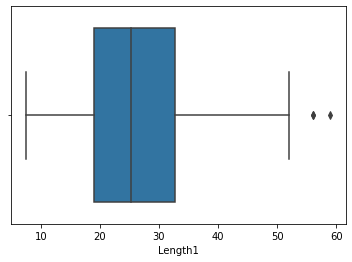

In [311]:
sns.boxplot(df_fish['Length1'])

In [312]:
Q1 = df_fish['Length1'].quantile(0.25)
Q3 = df_fish['Length1'].quantile(0.75)

In [313]:
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [314]:
df_fish[((df_fish['Length1'] < low_fence) | (df_fish['Length1'] > up_fence))]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [315]:
df_fish = df_fish[~((df_fish['Length1'] < low_fence) | (df_fish['Length1'] > up_fence))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


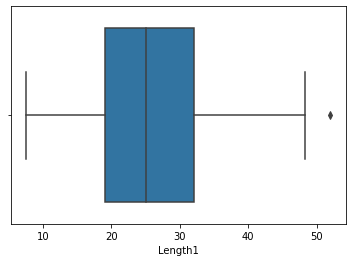

In [316]:
sns.boxplot(df_fish['Length1'])

In [317]:
Q1 = df_fish['Length1'].quantile(0.25)
Q3 = df_fish['Length1'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR

In [318]:
df_fish[((df_fish['Length1'] < low_fence) | (df_fish['Length1'] > up_fence))]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


In [319]:
df_fish = df_fish[~((df_fish['Length1'] < low_fence) | (df_fish['Length1'] > up_fence))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


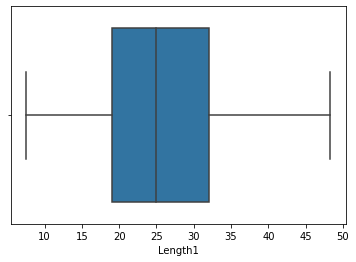

In [320]:
sns.boxplot(df_fish['Length1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


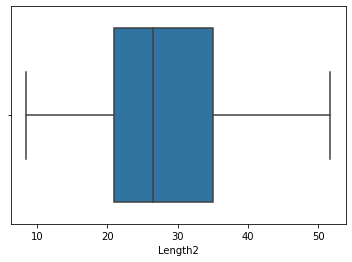

In [321]:
sns.boxplot(df_fish['Length2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


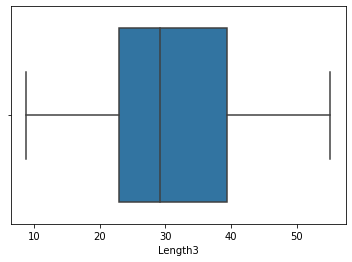

In [322]:
sns.boxplot(df_fish['Length3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


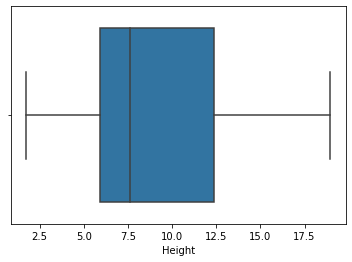

In [323]:
sns.boxplot(df_fish['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


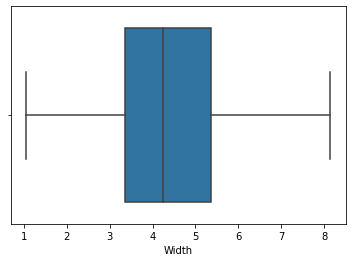

In [324]:
sns.boxplot(df_fish['Width'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


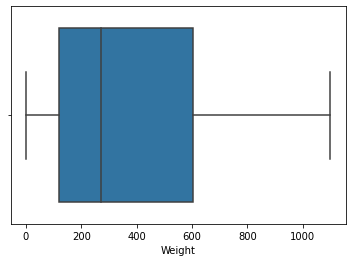

In [325]:
sns.boxplot(df_fish['Weight'])

In [326]:
df_fish.reset_index(drop=True, inplace=True)

In [327]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
150,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
151,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
152,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
153,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [328]:
scaler = StandardScaler()

In [430]:
X_fish = df_fish.drop(columns=['Species','Weight'])
y_fish = df_fish['Weight']

In [433]:
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size=0.3)
X_fish_train

,Length1,Length2,Length3,Height,Width
7,27.6,30.0,35.0,12.6700,4.6900
29,33.5,37.0,42.6,18.9570,6.6030
124,39.8,43.0,45.2,11.9328,7.2772
125,40.1,43.0,45.5,12.5125,7.4165
49,22.0,23.4,26.7,6.9153,3.6312
...,...,...,...,...,...
143,10.1,10.6,11.6,1.7284,1.1484
120,37.0,40.0,42.5,11.7300,7.2250
128,30.0,32.3,34.8,5.5680,3.3756
74,13.8,15.0,16.0,3.8240,2.4320


In [331]:
X_fish_train = scaler.fit_transform(X_fish_train)
X_fish_test = scaler.transform(X_fish_test)

In [332]:
y_fish_train = np.array(y_fish_train).reshape(-1,1)
y_fish_test = np.array(y_fish_test).reshape(-1,1)

In [333]:
y_fish_train = scaler.fit_transform(y_fish_train)
y_fish_test = scaler.fit_transform(y_fish_test)

In [334]:
y_fish_train = y_fish_train.flatten()
y_fish_test = y_fish_test.flatten()

In [335]:
reg_GD = LinearRegression_GD(eta=0.001, max_iter=20, random_state=1)
reg_GD.fit(X_fish_train, y_fish_train)

In [336]:
reg_SGD = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD.fit(X_fish_train, y_fish_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [337]:
reg_NE = LinearRegression()
reg_NE.fit(X_fish_train, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

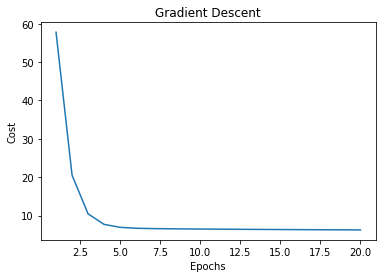

In [338]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [339]:
y_fish_pred_1 = reg_GD.predict(X_fish_test)
y_fish_pred_2 = reg_SGD.predict(X_fish_test)
y_fish_pred_3 = reg_NE.predict(X_fish_test)

In [340]:
print('MSE of GD:', round(MSE(y_fish_test, y_fish_pred_1), 6))
print('MSE of SGD:', round(MSE(y_fish_test, y_fish_pred_2), 6))
print('MSE of NE:', round(MSE(y_fish_test, y_fish_pred_3), 6))

MSE of GD: 0.108289
MSE of SGD: 0.108503
MSE of NE: 0.112163


In [341]:
print('R2 score of GD:', round(R2(y_fish_test, y_fish_pred_1), 6))
print('R2 score of SGD:', round(R2(y_fish_test, y_fish_pred_2), 6))
print('R2 score of NE:', round(R2(y_fish_test, y_fish_pred_3), 6))

R2 score of GD: 0.891711
R2 score of SGD: 0.891497
R2 score of NE: 0.887837


In [342]:
url='https://drive.google.com/file/d/1tXCcxOIz2el-sHIFbYnhNohGQdf5TTpC/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_1 = pd.read_csv(url2)

In [343]:
df_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


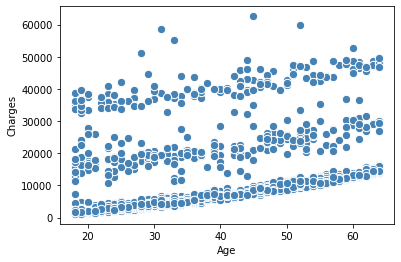

In [440]:
plt.scatter(df_1['age'],df_1['charges'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

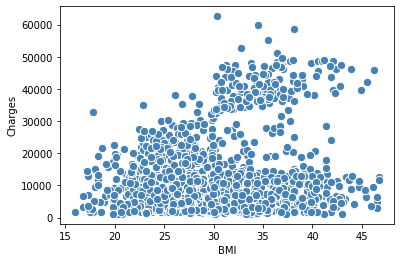

In [439]:
plt.scatter(df_1['bmi'],df_1['charges'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [344]:
countNULL = df_1.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


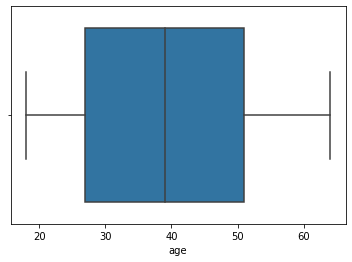

In [614]:
sns.boxplot(df_1['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


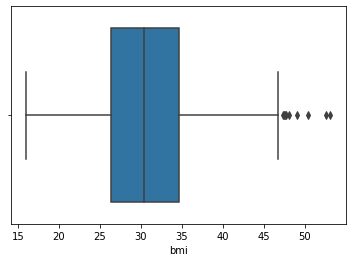

In [345]:
sns.boxplot(df_1['bmi'])

In [346]:
Q1 = df_1['bmi'].quantile(0.25)
Q3 = df_1['bmi'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR
df_1[((df_1['bmi'] < low_fence) | (df_1['bmi'] > up_fence))]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [347]:
df_1 = df_1[~((df_1['bmi'] < low_fence) | (df_1['bmi'] > up_fence))]

In [348]:
df_1.reset_index(drop=True, inplace=True)

In [349]:
label_encoder = LabelEncoder()

In [350]:
df_1['sex'] = label_encoder.fit_transform(df_1['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [351]:
df_1['smoker'] = label_encoder.fit_transform(df_1['smoker'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [352]:
onehot_encoder = OneHotEncoder(sparse=False)
name_col = 'region'
data_new = onehot_encoder.fit_transform(df_1[[name_col]])
grade_column = pd.DataFrame(data=data_new, columns=onehot_encoder.get_feature_names([name_col]))
df_1 = pd.concat([df_1.drop(columns=[name_col, 'charges']), grade_column, df_1['charges']], axis=1)

In [353]:
df_1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1324,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1325,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1326,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1327,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


In [354]:
X_1 = df_1.drop(columns=['charges'])
y_1 = df_1['charges']

In [355]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3)

In [356]:
scaler = StandardScaler()

In [357]:
X_1_train = scaler.fit_transform(X_1_train)
X_1_test = scaler.transform(X_1_test)

In [358]:
y_1_train = np.array(y_1_train).reshape(-1,1)
y_1_test = np.array(y_1_test).reshape(-1,1)

In [359]:
y_1_train = scaler.fit_transform(y_1_train)
y_1_test = scaler.fit_transform(y_1_test)

In [360]:
y_1_train = y_1_train.flatten()
y_1_test = y_1_test.flatten()

In [361]:
reg_GD_1 = LinearRegression_GD(eta=0.001, max_iter=20, random_state=1)
reg_GD_1.fit(X_1_train, y_1_train)

reg_SGD_1 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_1.fit(X_1_train, y_1_train)

reg_NE_1 = LinearRegression()
reg_NE_1.fit(X_1_train, y_1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

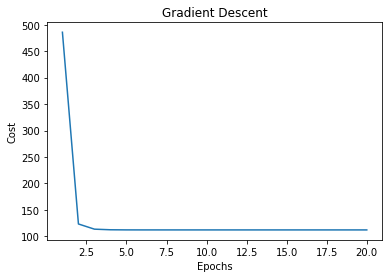

In [362]:
plt.plot(range(1, len(reg_GD_1.costs) + 1), reg_GD_1.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [363]:
y_1_pred_1 = reg_GD_1.predict(X_1_test)
y_1_pred_2 = reg_SGD_1.predict(X_1_test)
y_1_pred_3 = reg_NE_1.predict(X_1_test)

In [364]:
print('MSE of GD:', round(MSE(y_1_test, y_1_pred_1), 6))
print('MSE of SGD:', round(MSE(y_1_test, y_1_pred_2), 6))
print('MSE of NE:', round(MSE(y_1_test, y_1_pred_3), 6))

print('R2 score of GD:', round(R2(y_1_test, y_1_pred_1), 6))
print('R2 score of SGD:', round(R2(y_1_test, y_1_pred_2), 6))
print('R2 score of NE:', round(R2(y_1_test, y_1_pred_3), 6))

MSE of GD: 0.28181
MSE of SGD: 0.281519
MSE of NE: 0.28181
R2 score of GD: 0.71819
R2 score of SGD: 0.718481
R2 score of NE: 0.71819


In [365]:
url='https://drive.google.com/file/d/1V0NAk8QuMU_o08s-8cGRyD2FORanJ9LM/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_2 = pd.read_csv(url2)

In [366]:
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [367]:
countNULL = df_2.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

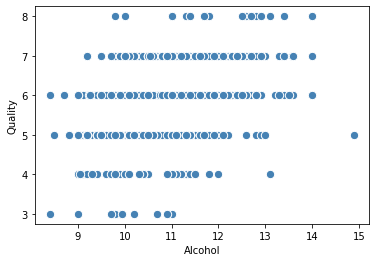

In [414]:
plt.scatter(df_2['alcohol'],df_2['quality'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

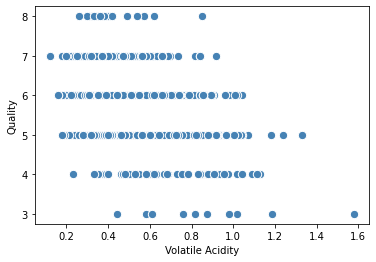

In [415]:
plt.scatter(df_2['volatile acidity'],df_2['quality'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

In [370]:
X_2 = df_2.drop(columns=['quality'])
y_2 = df_2['quality']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3)

In [371]:
scaler = StandardScaler()

In [372]:
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

In [373]:
y_2_train = np.array(y_2_train).reshape(-1,1)
y_2_test = np.array(y_2_test).reshape(-1,1)

In [374]:
y_2_train = scaler.fit_transform(y_2_train)
y_2_test = scaler.fit_transform(y_2_test)

In [375]:
y_2_train = y_2_train.flatten()
y_2_test = y_2_test.flatten()

In [376]:
reg_GD_2 = LinearRegression_GD(eta=0.001, max_iter=20, random_state=1)
reg_GD_2.fit(X_2_train, y_2_train)

In [377]:
reg_SGD_2 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_2.fit(X_2_train, y_2_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [378]:
reg_NE_2 = LinearRegression()
reg_NE_2.fit(X_2_train, y_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

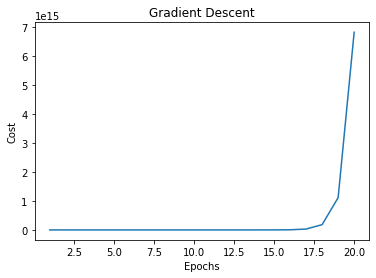

In [379]:
plt.plot(range(1, len(reg_GD_2.costs) + 1), reg_GD_2.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [380]:
y_2_pred_1 = reg_GD_2.predict(X_2_test)
y_2_pred_2 = reg_SGD_2.predict(X_2_test)
y_2_pred_3 = reg_NE_2.predict(X_2_test)

In [381]:
print('MSE of GD:', round(MSE(y_2_test, y_2_pred_1), 6))
print('MSE of SGD:', round(MSE(y_2_test, y_2_pred_2), 6))
print('MSE of NE:', round(MSE(y_2_test, y_2_pred_3), 6))

print('R2 score of GD:', round(R2(y_2_test, y_2_pred_1), 6))
print('R2 score of SGD:', round(R2(y_2_test, y_2_pred_2), 6))
print('R2 score of NE:', round(R2(y_2_test, y_2_pred_3), 6))

MSE of GD: 72155090997915.52
MSE of SGD: 0.639019
MSE of NE: 0.643113
R2 score of GD: -72155090997914.56
R2 score of SGD: 0.360981
R2 score of NE: 0.356887


In [584]:
url='https://drive.google.com/file/d/1j8DqKUHZcljGEA1mGzoMxEUTmjyX9Gl-/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_3 = pd.read_csv(url2)

In [585]:
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


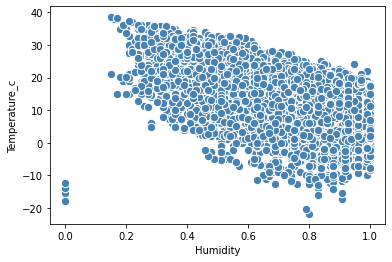

In [586]:
plt.scatter(df_3['Humidity'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Humidity')
plt.ylabel('Temperature_c')
plt.show()

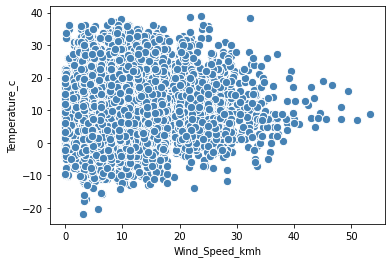

In [587]:
plt.scatter(df_3['Wind_Speed_kmh'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Wind_Speed_kmh')
plt.ylabel('Temperature_c')
plt.show()

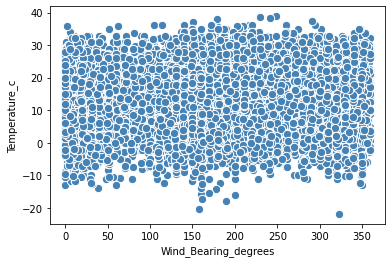

In [588]:
plt.scatter(df_3['Wind_Bearing_degrees'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Wind_Bearing_degrees')
plt.ylabel('Temperature_c')
plt.show()

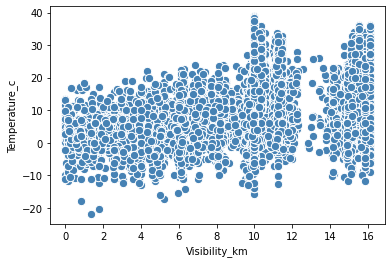

In [589]:
plt.scatter(df_3['Visibility_km'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Visibility_km')
plt.ylabel('Temperature_c')
plt.show()

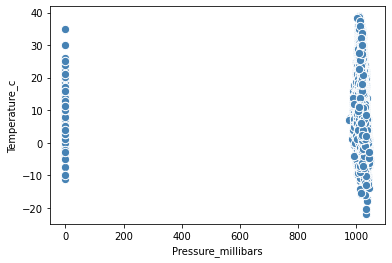

In [590]:
plt.scatter(df_3['Pressure_millibars'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Pressure_millibars')
plt.ylabel('Temperature_c')
plt.show()

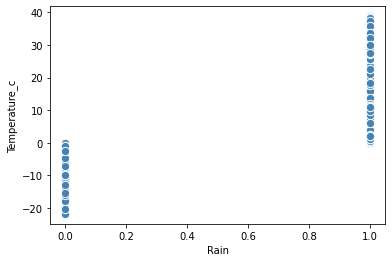

In [591]:
plt.scatter(df_3['Rain'],df_3['Temperature_c'], c='steelblue', edgecolor='white', s=70)
plt.xlabel('Rain')
plt.ylabel('Temperature_c')
plt.show()

In [592]:
countNULL = df_3.isna().sum()
null_columns = countNULL[countNULL > 0]
null_columns

Series([], dtype: int64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


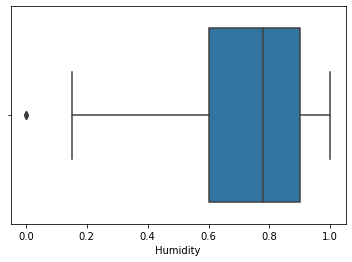

In [593]:
sns.boxplot(df_3['Humidity'])

In [594]:
Q1 = df_3['Humidity'].quantile(0.25)
Q3 = df_3['Humidity'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR
df_3[((df_3['Humidity'] < low_fence) | (df_3['Humidity'] > up_fence))]

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
1083,-15.555556,0.0,6.44,160,9.982,1015.9,0,Cold
2259,-13.888889,0.0,22.54,160,9.982,1016.8,0,Cold
4526,-17.777778,0.0,3.22,190,0.805,1035.0,0,Cold
9014,-12.222222,0.0,17.71,30,9.982,1030.0,0,Cold


In [595]:
df_3 = df_3[~((df_3['Humidity'] < low_fence) | (df_3['Humidity'] > up_fence))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


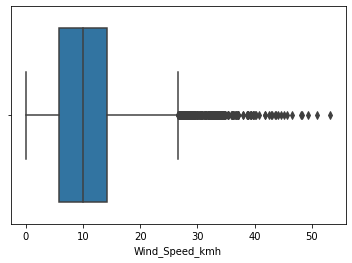

In [596]:
sns.boxplot(df_3['Wind_Speed_kmh'])

In [597]:
Q1 = df_3['Wind_Speed_kmh'].quantile(0.25)
Q3 = df_3['Wind_Speed_kmh'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - 1.5*IQR
up_fence = Q3 + 1.5*IQR
df_3[((df_3['Wind_Speed_kmh'] < low_fence) | (df_3['Wind_Speed_kmh'] > up_fence))]

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
50,9.050000,0.61,44.6292,309,11.4954,1019.96,1,Normal
56,12.788889,0.78,34.6955,150,9.8693,993.93,1,Normal
71,6.088889,0.65,34.6311,309,10.0464,1009.67,1,Normal
87,7.316667,0.77,32.8118,10,9.9820,1016.11,1,Normal
182,10.000000,0.89,32.2000,330,16.1000,999.50,1,Normal
...,...,...,...,...,...,...,...,...
9847,15.038889,0.42,32.8923,309,9.9820,1024.48,1,Normal
9867,1.111111,0.85,28.5292,310,11.2056,1011.01,1,Cold
9904,6.022222,0.79,40.0568,160,10.3684,1000.44,1,Normal
9954,16.016667,0.27,49.3948,300,9.9820,1014.29,1,Normal


In [598]:
df_3 = df_3[~((df_3['Wind_Speed_kmh'] < low_fence) | (df_3['Wind_Speed_kmh'] > up_fence))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


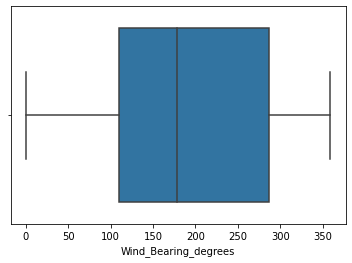

In [599]:
sns.boxplot(df_3['Wind_Bearing_degrees'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


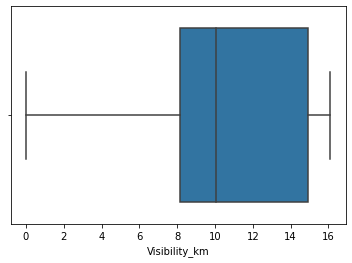

In [600]:
sns.boxplot(df_3['Visibility_km'])

In [601]:
df_3.reset_index(drop=True, inplace=True)
df_3

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9656,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9657,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9658,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9659,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [602]:
X_3 = df_3.drop(columns=['Temperature_c', 'Description'])
y_3 = df_3['Temperature_c']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3)

In [603]:
scaler = StandardScaler()

In [604]:
X_3_train = scaler.fit_transform(X_3_train)
X_3_test = scaler.transform(X_3_test)

In [605]:
y_3_train = np.array(y_3_train).reshape(-1,1)
y_3_test = np.array(y_3_test).reshape(-1,1)

In [606]:
y_3_train = scaler.fit_transform(y_3_train)
y_3_test = scaler.fit_transform(y_3_test)

In [607]:
y_3_train = y_3_train.flatten()
y_3_test = y_3_test.flatten()

In [608]:
reg_GD_3 = LinearRegression_GD(eta=0.001, max_iter=20, random_state=1)
reg_GD_3.fit(X_3_train, y_3_train)

In [609]:
reg_SGD_3 = SGDRegressor(eta0=0.001, max_iter=20, random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_3.fit(X_3_train, y_3_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0,
             learning_rate='constant', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [610]:
reg_NE_3 = LinearRegression()
reg_NE_3.fit(X_3_train, y_3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

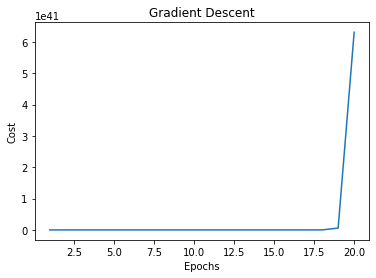

In [611]:
plt.plot(range(1, len(reg_GD_3.costs) + 1), reg_GD_3.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [612]:
y_3_pred_1 = reg_GD_3.predict(X_3_test)
y_3_pred_2 = reg_SGD_3.predict(X_3_test)
y_3_pred_3 = reg_NE_3.predict(X_3_test)

In [613]:
print('MSE of GD:', round(MSE(y_3_test, y_3_pred_1), 6))
print('MSE of SGD:', round(MSE(y_3_test, y_3_pred_2), 6))
print('MSE of NE:', round(MSE(y_3_test, y_3_pred_3), 6))

print('R2 score of GD:', round(R2(y_3_test, y_3_pred_1), 6))
print('R2 score of SGD:', round(R2(y_3_test, y_3_pred_2), 6))
print('R2 score of NE:', round(R2(y_3_test, y_3_pred_3), 6))

MSE of GD: 2.0900153613670694e+40
MSE of SGD: 0.382989
MSE of NE: 0.382972
R2 score of GD: -2.0900153613670702e+40
R2 score of SGD: 0.617011
R2 score of NE: 0.617028
